# Predicting Telephonic Marketing Outcome for Bank Term Deposit

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Set-Information:" data-toc-modified-id="Data-Set-Information:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Set Information:</a></span></li><li><span><a href="#Attribute-Information:" data-toc-modified-id="Attribute-Information:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Attribute Information:</a></span><ul class="toc-item"><li><span><a href="#Input-variables:" data-toc-modified-id="Input-variables:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Input variables:</a></span></li></ul></li><li><span><a href="#Utility-Functions" data-toc-modified-id="Utility-Functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Utility Functions</a></span></li><li><span><a href="#Reading-Data" data-toc-modified-id="Reading-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Reading Data</a></span><ul class="toc-item"><li><span><a href="#Removing-hyphen-and-dot-from-the-categorical-feature-names" data-toc-modified-id="Removing-hyphen-and-dot-from-the-categorical-feature-names-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Removing hyphen and dot from the categorical feature names</a></span></li><li><span><a href="#Adding-Engineered-Categorical-Features" data-toc-modified-id="Adding-Engineered-Categorical-Features-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Adding Engineered Categorical Features</a></span></li><li><span><a href="#Adding-Engineered-Sin-Features" data-toc-modified-id="Adding-Engineered-Sin-Features-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Adding Engineered Sin Features</a></span></li><li><span><a href="#Lets-do-a-Train-Test-Split" data-toc-modified-id="Lets-do-a-Train-Test-Split-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Lets do a Train-Test Split</a></span></li><li><span><a href="#Standardizing-the-Features-in-the-Train,-CV-and-Test-Datasets" data-toc-modified-id="Standardizing-the-Features-in-the-Train,-CV-and-Test-Datasets-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Standardizing the Features in the Train, CV and Test Datasets</a></span></li></ul></li><li><span><a href="#Machine-Learning-Models" data-toc-modified-id="Machine-Learning-Models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Machine Learning Models</a></span><ul class="toc-item"><li><span><a href="#Training-the-Best-Model" data-toc-modified-id="Training-the-Best-Model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Training the Best Model</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#References" data-toc-modified-id="References-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

__In this Case Study we will take the new Dataset bank-additional-full.csv__

## Attribute Information:

### Input variables:

__bank_additional client data:__
   1. age (numeric)
   2. job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5. default: has credit in default? (categorical: "no","yes","unknown")
   6. housing: has housing loan? (categorical: "no","yes","unknown")
   7. loan: has personal loan? (categorical: "no","yes","unknown")
   
__related with the last contact of the current campaign:__
   8. contact: contact communication type (categorical: "cellular","telephone") 
   9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
   11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   
__other attributes:__
   12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
   14. previous: number of contacts performed before this campaign and for this client (numeric)
   15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   
__social and economic context attributes:__
   16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
   17. cons.price.idx: consumer price index - monthly indicator (numeric)     
   18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
   19. euribor3m: euribor 3 month rate - daily indicator (numeric)
   20. nr.employed: number of employees - quarterly indicator (numeric)

__Output variable (desired target):__
   21. y - has the client subscribed a term deposit? (binary: "yes","no")
   
__Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.__

## Utility Functions

In [1]:
#function that will return the sine of the feature
def return_sin(x):
    return(np.sin(x))

In [2]:
#This function will take a list of features and Return the combination of 2 attributes ie nC2 
#wherein n = length of the list and the features will be used for ploting pairplots
def return_nc2(x):
    com = combinations(x, 2)
    return com

In [3]:
#This function will plot the scatter plots given an array of features and the data
def plotscatter(d, f):
    #get the combinations of the features
    f2 = list(return_nc2(f))
    #get length of combination
    n = len(f2)
    #initialize the 
    fig = [random.random() for z in range(45)]
    axes = [random.random() for z in range(45)]
    #plot all subplots
    for i in range(0, n):
        #plotting the scatterplot
        fig[i], axes[i] = plt.subplots(figsize=(20, 10))
        sns.scatterplot(x=f2[i][0], y=f2[i][1], hue='y', data=d, ax=axes[i])

In [4]:
#These functions will convert the numerical data to categorical data
#pdays, cons.price.idx, cons.conf.idx, nr.employed


#convert pdays to pdays_cat
def convert_pdays_cat(x):
    #threshold=512.5 if t<=512.5 then pdays_cat_yes else pdays_cat_no
    x['pdays_cat'] = np.where(x['pdays'] <= 513, 'pdays_cat_yes',
                              'pdays_cat_no')


#convert cons.price.idx to cons.price.idx_cat
def convert_cons_price_idx_cat(x):
    #threshold=92.868 if t<=92.868 then cons_price_idx_cat_yes else cons_price_idx_cat_no
    x['cons.price.idx_cat'] = np.where(x['cons.price.idx'] <= 92.868,
                                       'cons_price_idx_yes',
                                       'cons_price_idx_no')


#convert cons.conf.idx to cons.conf.idx_cat
def convert_cons_conf_idx_cat(x):
    #threshold = -35.45 if t<=-35.45 then cons_conf_idx_cat_no else cons_conf_idx_cat_yes
    x['cons.conf.idx_cat'] = np.where(x['cons.conf.idx'] <= -35.45,
                                      'cons_conf_idx_cat_no',
                                      'cons_conf_idx_cat_yes')


#convert nr.employed to nr.employed_cat
def convert_nr_employed_cat(x):
    #threshold=5087.65 if t<=5087.65 then nr_employed_cat_yes else nr_employed_cat_no
    x['nr.employed_cat'] = np.where(x['nr.employed'] <= 5087.65,
                                    'nr_employed_cat_yes',
                                    'nr_employed_cat_no')

In [5]:
#Now we need to add the engineered features to the cv and the test datasets as well
#hence we create a function for doing the same
def add_features(x_data):
    #add y label to the data
    y_label = x_data['y']  #get y label
    le = LabelEncoder()
    output = le.fit_transform(y_label)  #transform the y label to 0/1 form
    x_data['output'] = output

    #remove the y label and output label
    x_data.drop(['y'], axis=1, inplace=True)
    y_data = x_data['output']
    x_data.drop(['output'], axis=1, inplace=True)

    #Add sine features to the dataset
    fets = [
        'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
        'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
    ]  #Features for which sine functions will be added
    for f in fets:
        #get the sine feature for the feature f
        tmp_sin = return_sin(x_data[f].values)
        #create a str name f + '_sin' as the feature_name
        f_name = f + '_sin'
        #add sin feature to the data
        x_data[f_name] = tmp_sin

    #convert selected numerical data to categorical data based on the EDA
    convert_pdays_cat(x_data)
    convert_cons_price_idx_cat(x_data)
    convert_cons_conf_idx_cat(x_data)
    convert_nr_employed_cat(x_data)
    return y_data

In [6]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [7]:
#function to find maximum auc score and the parameters from the given numpy array
def get_max_auc(arr):
    max_auc = 0
    k = 0
    d = 0
    for a in arr:
        if max_auc < a[2]:
            max_auc = a[2]
            k = a[0]
            d = a[1]
    return max_auc, k, d

In [8]:
#function to find minimum loss and the parameters from the given numpy array
def get_min_loss(arr):
    min_loss = 99999990
    k = 0
    d = 0
    for a in arr:
        if min_loss > a[2]:
            min_loss = a[2]
            k = a[0]
            d = a[1]
    return min_loss, k, d

In [9]:
#function to find maximum F1 score and the parameters from the given numpy array
def get_max_F1(arr):
    max_F1 = 0
    k = 0
    d = 0
    for a in arr:
        if max_F1 < a[2]:
            max_F1 = a[2]
            k = a[0]
            d = a[1]
    return max_F1, k, d

## Reading Data

In [10]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from itertools import combinations
import random
from scipy import sparse
from scipy.sparse import vstack

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import pickle

In [11]:
#reading bank_additional.csv
df = pd.read_csv('bank-additional-full.csv', sep=';')
print('df.csv shape', df.shape)
df.columns

df.csv shape (41188, 21)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [12]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [14]:
#Lets look at the number of positive and negative points
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [15]:
n = 36548 / (36548 + 4640)

y = 4640 / (36548 + 4640)

print(n, y)

data = df

0.8873458288821987 0.11265417111780131


In [16]:
# check for duplicate values
print("No of Duplicates in dataset:  ",data.duplicated().sum())

No of Duplicates in dataset:   12


In [17]:
# drop the duplicates
data.drop_duplicates(inplace=True)

__The Dataset has 11.27% positive points and 88.73% negative points__

__There are Missing values in the dataset in the Categorical variables wherein they are encoded as 'unknown'__

In [18]:
#some col in the dataset have values as unknown we will change it to unknown_col_name

#Replace the unknown job level
data['job'].replace('unknown', 'unknown_job', inplace=True)

#Replace the unknown marital status
data['marital'].replace('unknown', 'unknown_marital', inplace=True)

#Replace the unknown education level
data['education'].replace('unknown', 'unknown_education', inplace=True)

#Replace the unknown default level
data['default'].replace('unknown', 'unknown_default', inplace=True)

#Replace the unknown housing level
data['housing'].replace('unknown', 'unknown_housing', inplace=True)

#Replace the unknown loan level
data['loan'].replace('unknown', 'unknown_loan', inplace=True)

#Replace the unknown and contact level
data['contact'].replace('unknown', 'unknown_contact', inplace=True)

#Replace the unknown and month level
data['month'].replace('unknown', 'unknown_month', inplace=True)

#Replace the unknown and day_of_week level
data['day_of_week'].replace('unknown', 'unknown_day_of_week', inplace=True)

#Replace the unknown and poutcome level
data['poutcome'].replace('unknown', 'unknown_poutcome', inplace=True)

### Removing hyphen and dot from the categorical feature names

In [19]:
z = 'job'
print(data[z].unique())
print(data[z].value_counts())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown_job' 'entrepreneur'
 'student']
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown_job        330
Name: job, dtype: int64


In [20]:
#removing 'hiphen' and 'dot' from the category names
data['job'].replace('blue-collar', 'blue_collar', inplace=True)
data['job'].replace('self-employed', 'self_employed', inplace=True)
#checking results
print(data[z].unique())
print(data[z].value_counts())

['housemaid' 'services' 'admin.' 'blue_collar' 'technician' 'retired'
 'management' 'unemployed' 'self_employed' 'unknown_job' 'entrepreneur'
 'student']
admin.           10419
blue_collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self_employed     1421
housemaid         1060
unemployed        1014
student            875
unknown_job        330
Name: job, dtype: int64


In [21]:
z = 'education'
print(data[z].unique())
print(data[z].value_counts())

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown_education' 'university.degree' 'illiterate']
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown_education       1730
illiterate                18
Name: education, dtype: int64


In [22]:
#removing 'hiphen' and 'dot' from the category names
data['education'].replace('university.degree', 'university_degree', inplace=True)
data['education'].replace('high.school', 'high_school', inplace=True)
data['education'].replace('basic.9y', 'basic_9y', inplace=True)
data['education'].replace('professional.course', 'professional_course', inplace=True)
data['education'].replace('basic.4y', 'basic_4y', inplace=True)
data['education'].replace('basic.6y', 'basic_6y', inplace=True)
#checking results
print(data[z].unique())
print(data[z].value_counts())

['basic_4y' 'high_school' 'basic_6y' 'basic_9y' 'professional_course'
 'unknown_education' 'university_degree' 'illiterate']
university_degree      12164
high_school             9512
basic_9y                6045
professional_course     5240
basic_4y                4176
basic_6y                2291
unknown_education       1730
illiterate                18
Name: education, dtype: int64


In [23]:
z = 'default'
print(data[z].unique())
print(data[z].value_counts())

['no' 'unknown_default' 'yes']
no                 32577
unknown_default     8596
yes                    3
Name: default, dtype: int64


In [24]:
#renaming 'yes' and 'no' in the category names
data['default'].replace('yes', 'yes_default', inplace=True)
data['default'].replace('no', 'no_default', inplace=True)
#checking results
print(data[z].unique())
print(data[z].value_counts())

['no_default' 'unknown_default' 'yes_default']
no_default         32577
unknown_default     8596
yes_default            3
Name: default, dtype: int64


In [25]:
z = 'housing'
print(data[z].unique())
print(data[z].value_counts())

['no' 'yes' 'unknown_housing']
yes                21571
no                 18615
unknown_housing      990
Name: housing, dtype: int64


In [26]:
#renaming 'yes' and 'no' in the category names
data['housing'].replace('yes', 'yes_housing', inplace=True)
data['housing'].replace('no', 'no_housing', inplace=True)
#checking results
print(data[z].unique())
print(data[z].value_counts())

['no_housing' 'yes_housing' 'unknown_housing']
yes_housing        21571
no_housing         18615
unknown_housing      990
Name: housing, dtype: int64


In [27]:
z = 'loan'
print(data[z].unique())
print(data[z].value_counts())

['no' 'yes' 'unknown_loan']
no              33938
yes              6248
unknown_loan      990
Name: loan, dtype: int64


In [28]:
#renaming 'yes' and 'no' in the category names
data['loan'].replace('yes', 'yes_loan', inplace=True)
data['loan'].replace('no', 'no_loan', inplace=True)
#checking results
print(data[z].unique())
print(data[z].value_counts())

['no_loan' 'yes_loan' 'unknown_loan']
no_loan         33938
yes_loan         6248
unknown_loan      990
Name: loan, dtype: int64


In [29]:
z = 'poutcome'
print(data[z].unique())
print(data[z].value_counts())

['nonexistent' 'failure' 'success']
nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64


In [30]:
#renaming 'nonexistent', 'failure', 'success' in the category names
data['poutcome'].replace('nonexistent', 'nonexistent_poutcome', inplace=True)
data['poutcome'].replace('failure', 'failure_poutcome', inplace=True)
data['poutcome'].replace('success', 'success_poutcome', inplace=True)
#checking results
print(data[z].unique())
print(data[z].value_counts())

['nonexistent_poutcome' 'failure_poutcome' 'success_poutcome']
nonexistent_poutcome    35551
failure_poutcome         4252
success_poutcome         1373
Name: poutcome, dtype: int64


### Adding Engineered Categorical Features

In [31]:
#add the categorical features for the cols pdays, cons_price_idx, cons_conf_idx, nr_employed
convert_pdays_cat(data)
convert_cons_price_idx_cat(data)
convert_cons_conf_idx_cat(data)
convert_nr_employed_cat(data)

In [32]:
data.shape

(41176, 25)

In [33]:
df.shape

(41176, 25)

### Adding Engineered Sin Features

In [34]:
z_sin = 'age_sin'
z = 'age'

In [35]:
#get sine of feature and add it to the dataframe
tmp_sin = return_sin(data[z].values)
data[z_sin] = tmp_sin

In [36]:
z_sin = 'duration_sin'
z = 'duration'

In [37]:
#get sine of feature and add it to the dataframe
tmp_sin = return_sin(data[z].values)
data[z_sin] = tmp_sin

In [38]:
z_sin = 'campaign_sin'
z = 'campaign'

In [39]:
#get sine of feature and add it to the dataframe
tmp_sin = return_sin(data[z].values)
data[z_sin] = tmp_sin

In [40]:
z_sin = 'pdays_sin'
z = 'pdays'

In [41]:
#get sine of feature and add it to the dataframe
tmp_sin = return_sin(data[z].values)
data[z_sin] = tmp_sin

In [42]:
z_sin = 'previous_sin'
z = 'previous'

In [43]:
#get sine of feature and add it to the dataframe
tmp_sin = return_sin(data[z].values)
data[z_sin] = tmp_sin

In [44]:
z_sin = 'emp.var.rate_sin'
z = 'emp.var.rate'

In [45]:
#get sine of feature and add it to the dataframe
tmp_sin = return_sin(data[z].values)
data[z_sin] = tmp_sin

In [46]:
z_sin = 'cons.price.idx_sin'
z = 'cons.price.idx'

In [47]:
#get sine of feature and add it to the dataframe
tmp_sin = return_sin(data[z].values)
data[z_sin] = tmp_sin

In [48]:
z_sin = 'cons.conf.idx_sin'
z = 'cons.conf.idx'

In [49]:
#get sine of feature and add it to the dataframe
tmp_sin = return_sin(data[z].values)
data[z_sin] = tmp_sin

In [50]:
z_sin = 'euribor3m_sin'
z = 'euribor3m'

In [51]:
#get sine of feature and add it to the dataframe
tmp_sin = return_sin(data[z].values)
data[z_sin] = tmp_sin

In [52]:
z_sin = 'nr.employed_sin'
z = 'nr.employed'

In [53]:
#get sine of feature and add it to the dataframe
tmp_sin = return_sin(data[z].values)
data[z_sin] = tmp_sin

In [54]:
data.shape

(41176, 35)

In [55]:
df.shape

(41176, 35)

### Lets do a Train-Test Split

In [56]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,age_sin,duration_sin,campaign_sin,pdays_sin,previous_sin,emp.var.rate_sin,cons.price.idx_sin,cons.conf.idx_sin,euribor3m_sin,nr.employed_sin
0,56,housemaid,married,basic_4y,no_default,no_housing,no_loan,telephone,may,mon,...,-0.521551,-0.245281,0.841471,-0.026461,0.0,0.891207,-0.251064,0.96332,-0.989562,0.886134
1,57,services,married,high_school,unknown_default,no_housing,no_loan,telephone,may,mon,...,0.436165,-0.974649,0.841471,-0.026461,0.0,0.891207,-0.251064,0.96332,-0.989562,0.886134
2,37,services,married,high_school,no_default,yes_housing,no_loan,telephone,may,mon,...,-0.643538,-0.193444,0.841471,-0.026461,0.0,0.891207,-0.251064,0.96332,-0.989562,0.886134
3,40,admin.,married,basic_6y,no_default,no_housing,no_loan,telephone,may,mon,...,0.745113,0.202150,0.841471,-0.026461,0.0,0.891207,-0.251064,0.96332,-0.989562,0.886134
4,56,services,married,high_school,no_default,no_housing,yes_loan,telephone,may,mon,...,-0.521551,-0.768235,0.841471,-0.026461,0.0,0.891207,-0.251064,0.96332,-0.989562,0.886134


In [57]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'pdays_cat',
       'cons.price.idx_cat', 'cons.conf.idx_cat', 'nr.employed_cat', 'age_sin',
       'duration_sin', 'campaign_sin', 'pdays_sin', 'previous_sin',
       'emp.var.rate_sin', 'cons.price.idx_sin', 'cons.conf.idx_sin',
       'euribor3m_sin', 'nr.employed_sin'],
      dtype='object')

In [58]:
y_label = df['y'] #get output variable
le = LabelEncoder()
output = le.fit_transform(y_label) #transform the output variable to 0/1 form
df['output'] = output

In [59]:
#here we will split our data randomly as there is no temporal nature of the data
Y_True = df['output'].values.reshape(-1,1)

#remove the 'y' and 'output' columns
df.drop(['y'], axis=1, inplace=True)
df.drop(['output'], axis=1, inplace=True)
print(df.shape)
print(df.columns)

(41176, 34)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pdays_cat',
       'cons.price.idx_cat', 'cons.conf.idx_cat', 'nr.employed_cat', 'age_sin',
       'duration_sin', 'campaign_sin', 'pdays_sin', 'previous_sin',
       'emp.var.rate_sin', 'cons.price.idx_sin', 'cons.conf.idx_sin',
       'euribor3m_sin', 'nr.employed_sin'],
      dtype='object')


In [60]:
#splitting the data to train and test
df_Train_temp, df_Test, Y_Train_temp, Y_Test = train_test_split(df, Y_True, stratify=Y_True, test_size=0.3, random_state = 4) 
df_Train, df_CV, Y_Train, Y_CV = train_test_split(df_Train_temp, Y_Train_temp, stratify=Y_Train_temp, test_size=0.3, random_state = 4) 

In [61]:
#lets see the shape of the train cv and test data
print('df_train shape: {} Y_train shape: {}'.format(df_Train.shape, Y_Train.shape))
print('df_CV shape: {} Y_CV shape: {}'.format(df_CV.shape, Y_CV.shape))
print('df_test shape: {} Y_test shape: {}'.format(df_Test.shape, Y_Test.shape))

df_train shape: (20176, 34) Y_train shape: (20176, 1)
df_CV shape: (8647, 34) Y_CV shape: (8647, 1)
df_test shape: (12353, 34) Y_test shape: (12353, 1)


### Standardizing the Features in the Train, CV and Test Datasets

__We have 34 Features out of which 20 are numerical features while 14 are categorical features, so for the numerical features we will use standard_scalar while for the categorical features we will use countvectorizer__

__Here we will use a function standerdize_data to standardize the data__

In [62]:
#This function will standardize the data given a dataframe
#if the data is train data we will have to call to the function with tag = 1
#if the data is test/cv we will have to call the function with tag = 0
#The function will return the the np array after standardization process
#The standard_dict_cat is a dictionary of categorical feature names and their corresponding countvectorizer objects
#The standard_dict_num is a dictionary of numerical feature names and their corresponding standardscalar objects
#if the training data is provided the function will add values to the dectionaries standard_dict_cat,standard_dict_num
# Initially both the dectionaries will be initialized as <'feature_name':0>
# The value will be filled in the train process
# The same dictionaries will be used with the test/cv to transform data


def standardize_data(dataframe, tag, standard_dict_cat, standard_dict_num):
    #if the training data is passed with 0 initialized dectionaries
    if tag == 1:
        #Initialize the feature list
        features = []
        #Initialize the array for hstacking in the end
        array = []
        #convert categorical features to one hot encoding using countvectorizer
        for cat in standard_dict_cat.keys():
            #initialize the vectorizer
            vectorizer = CountVectorizer()
            #fit and transform train data
            X = vectorizer.fit_transform(dataframe[cat])
            #get feature names
            Z = vectorizer.get_feature_names()
            #add vectorizer to the dectionary
            standard_dict_cat[cat] = vectorizer
            #add features to the feature array
            features.extend(Z)
            #add data to the np array
            array.append(X)
        #scale numerical features using standardscalar
        for num in standard_dict_num.keys():
            #initialize the standardscalar
            scaler = StandardScaler()
            #fit and transform train data
            X = scaler.fit_transform(dataframe[num].values.reshape(-1, 1))
            #add scalar to the dectionary
            standard_dict_num[num] = scaler
            #add features to the feature array
            features.append(num)
            #add data to the np array
            array.append(X)

        #preparing np array for returing
        data_stand = sparse.hstack(
            (array[0], array[1], array[2], array[3], array[4], array[5],
             array[6], array[7], array[8], array[9], array[10], array[11],
             array[12], array[13], array[14], array[15], array[16], array[17],
             array[18], array[19], array[20], array[21], array[22], array[23],
             array[24], array[25], array[26], array[27], array[28], array[29],
             array[30], array[31], array[32], array[33]))
        #return data and the features
        return data_stand, features
    if tag == 0:
        #Initialize the feature list
        features = []
        #Initialize the array for hstacking in the end
        array = []
        #convert categorical features to one hot encoding using countvectorizer
        for cat in standard_dict_cat.keys():
            #transform train data
            X = standard_dict_cat[cat].transform(dataframe[cat])
            #get feature names
            Z = standard_dict_cat[cat].get_feature_names()
            #add features to the feature array
            features.extend(Z)
            #add data to the np array
            array.append(X)
        #scale numerical features using standardscalar
        for num in standard_dict_num.keys():
            #transform train data
            X = standard_dict_num[num].transform(dataframe[num].values.reshape(
                -1, 1))
            #add features to the feature array
            features.append(num)
            #add data to the np array
            array.append(X)

        #preparing np array for returing
        data_stand = sparse.hstack(
            (array[0], array[1], array[2], array[3], array[4], array[5],
             array[6], array[7], array[8], array[9], array[10], array[11],
             array[12], array[13], array[14], array[15], array[16], array[17],
             array[18], array[19], array[20], array[21], array[22], array[23],
             array[24], array[25], array[26], array[27], array[28], array[29],
             array[30], array[31], array[32], array[33]))

        #return data and the features
        return data_stand, features
    else:
        return 'Please input a valid tag'

In [63]:
#get all cols of the data
cols = list(df_Train.columns)
print(cols)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pdays_cat', 'cons.price.idx_cat', 'cons.conf.idx_cat', 'nr.employed_cat', 'age_sin', 'duration_sin', 'campaign_sin', 'pdays_sin', 'previous_sin', 'emp.var.rate_sin', 'cons.price.idx_sin', 'cons.conf.idx_sin', 'euribor3m_sin', 'nr.employed_sin']


In [64]:
#categorical features
cols_cat = [
    'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
    'month', 'day_of_week', 'poutcome', 'pdays_cat', 'cons.price.idx_cat',
    'cons.conf.idx_cat', 'nr.employed_cat'
]
print('cols_cat')
print(cols_cat,len(cols_cat))

#numerical features
cols_num = [
    'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
    'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'age_sin',
    'duration_sin', 'campaign_sin', 'pdays_sin', 'previous_sin',
    'emp.var.rate_sin', 'cons.price.idx_sin', 'cons.conf.idx_sin',
    'euribor3m_sin', 'nr.employed_sin'
]
print('cols_num')
print(cols_num,len(cols_num))

#initializing the standard_dict_cat dectionary
standard_dict_cat = dict.fromkeys(cols_cat,0)
print('standard_dict_cat')
print(standard_dict_cat)

#initializing the standard_dict_num dectionary
standard_dict_num = dict.fromkeys(cols_num,0)
print('standard_dict_num')
print(standard_dict_num)

cols_cat
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'pdays_cat', 'cons.price.idx_cat', 'cons.conf.idx_cat', 'nr.employed_cat'] 14
cols_num
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'age_sin', 'duration_sin', 'campaign_sin', 'pdays_sin', 'previous_sin', 'emp.var.rate_sin', 'cons.price.idx_sin', 'cons.conf.idx_sin', 'euribor3m_sin', 'nr.employed_sin'] 20
standard_dict_cat
{'job': 0, 'marital': 0, 'education': 0, 'default': 0, 'housing': 0, 'loan': 0, 'contact': 0, 'month': 0, 'day_of_week': 0, 'poutcome': 0, 'pdays_cat': 0, 'cons.price.idx_cat': 0, 'cons.conf.idx_cat': 0, 'nr.employed_cat': 0}
standard_dict_num
{'age': 0, 'duration': 0, 'campaign': 0, 'pdays': 0, 'previous': 0, 'emp.var.rate': 0, 'cons.price.idx': 0, 'cons.conf.idx': 0, 'euribor3m': 0, 'nr.employed': 0, 'age_sin': 0, 'duration_sin': 0, 'campaign_sin': 0, 'pdays_sin': 

In [65]:
#standerdizing train data
x_train, train_features = standardize_data(df_Train, 1, standard_dict_cat, standard_dict_num)
#standerdizing cv data
x_cv, cv_features = standardize_data(df_CV, 0, standard_dict_cat, standard_dict_num)
#standerdizing test data
x_test, test_features= standardize_data(df_Test, 0, standard_dict_cat, standard_dict_num)

In [66]:
#check if the feature names are same for train cv and test data
if train_features == cv_features == test_features:
    print(True)

True


In [67]:
#checking the shape and vales of train features
print(len(train_features))
print(train_features)

81
['admin', 'blue_collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self_employed', 'services', 'student', 'technician', 'unemployed', 'unknown_job', 'divorced', 'married', 'single', 'unknown_marital', 'basic_4y', 'basic_6y', 'basic_9y', 'high_school', 'illiterate', 'professional_course', 'university_degree', 'unknown_education', 'no_default', 'unknown_default', 'yes_default', 'no_housing', 'unknown_housing', 'yes_housing', 'no_loan', 'unknown_loan', 'yes_loan', 'cellular', 'telephone', 'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'fri', 'mon', 'thu', 'tue', 'wed', 'failure_poutcome', 'nonexistent_poutcome', 'success_poutcome', 'pdays_cat_no', 'pdays_cat_yes', 'cons_price_idx_no', 'cons_price_idx_yes', 'cons_conf_idx_cat_no', 'cons_conf_idx_cat_yes', 'nr_employed_cat_no', 'nr_employed_cat_yes', 'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'age_sin', 'duration_si

In [68]:
print(x_train.shape,x_cv.shape,x_test.shape)

(20176, 81) (8647, 81) (12353, 81)


## Machine Learning Models

In [69]:
print(type(x_train),type(x_cv),type(x_test),type(Y_Train),type(Y_CV),type(Y_Test))

<class 'scipy.sparse.coo.coo_matrix'> <class 'scipy.sparse.coo.coo_matrix'> <class 'scipy.sparse.coo.coo_matrix'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [70]:
X_Train = x_train.toarray()
X_CV = x_cv.toarray()
X_Test = x_test.toarray()

In [71]:
print(type(X_Train),type(X_CV),type(X_Test),type(Y_Train),type(Y_CV),type(Y_Test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


### Training the Best Model

In [72]:
#lets define the ML model which is the best amongst all
from mlxtend.classifier import StackingClassifier
#defining the base classifiers
lr = LogisticRegression(C = 0.001, class_weight = 'balanced', random_state=42)
rf = RandomForestClassifier(n_estimators=200 ,max_depth=13, class_weight='balanced', bootstrap=True, n_jobs = -1, random_state=42)
dt = DecisionTreeClassifier(max_depth=5, class_weight = 'balanced', random_state=42)
clf_base = SGDClassifier(loss='hinge', penalty='l1', alpha = 0.001, class_weight = 'balanced', n_jobs = -1, random_state=42)
svm = CalibratedClassifierCV(clf_base, method='isotonic')
xgboost = xgb.XGBRFClassifier(n_estimators=250 ,max_depth=5, class_weight='balanced', bootstrap=True, n_jobs = -1, random_state=42)
#Tuning the meta classifier with best hyperparameter
meta_clf = LogisticRegression(C=0.01, class_weight='balanced', random_state=42)
sclf = StackingClassifier(classifiers=[lr, rf, dt, svm, xgboost],
                          meta_classifier=meta_clf)
sclf.fit(X_Train, Y_Train)

StackingClassifier(average_probas=False,
                   classifiers=[LogisticRegression(C=0.001,
                                                   class_weight='balanced',
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='warn',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=42,
                                                   solver='warn', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                                RandomForestClassifier(bootstrap=True,
                                       

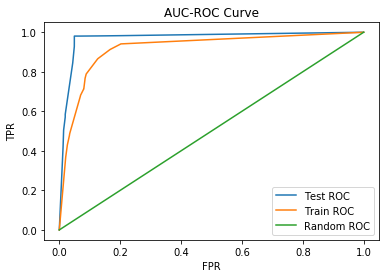

In [73]:
#getting the KPI values
Y_Predicted_Train = sclf.predict_proba(X_Train)
Y_Predicted_Train = Y_Predicted_Train[:,-1]
Y_Predicted_Test = sclf.predict_proba(X_Test)
Y_Predicted_Test = Y_Predicted_Test[:,-1]

# Calculating the ROC values  
fpr_Train, tpr_Train, thresholds_Train = roc_curve(Y_Train, Y_Predicted_Train)
fpr_Test, tpr_Test, thresholds_Test = roc_curve(Y_Test, Y_Predicted_Test)

#Plotting ROC Curve
plt.plot(fpr_Test, tpr_Test, label='Test ROC')
plt.plot(fpr_Train, tpr_Train, label='Train ROC')
plt.plot([0,1], [0,1], label='Random ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("AUC-ROC Curve")
plt.legend()

In [74]:
#Printing the KPI values
print('The auc is: ',roc_auc_score(Y_Test, Y_Predicted_Test))
print('The log loss is: ',log_loss(Y_Test, Y_Predicted_Test))
y_Predicted_Test = np.array(Y_Predicted_Test > 0.5, dtype=int)
print('The F1-Score is: ',f1_score(Y_Test, y_Predicted_Test, average='weighted'))

The auc is:  0.969419563038023
The log loss is:  0.21984594218898387
The F1-Score is:  0.9569795456555172


In [75]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(sclf, open(filename, 'wb'))

In [76]:
#Initializing variables for future use
stack_auc = roc_auc_score(Y_Test, Y_Predicted_Test)
stack_loss = log_loss(Y_Test, Y_Predicted_Test)
stack_f1_score = f1_score(Y_Test, y_Predicted_Test, average='weighted')

Total number of data points : 12353


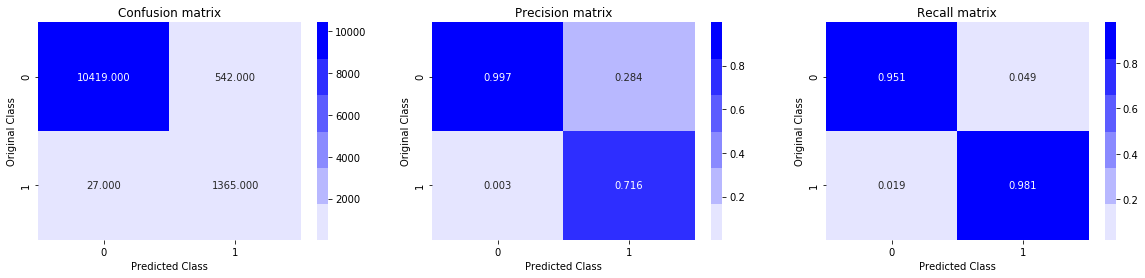

In [77]:
#Plot the Confusion Matrix
predicted_y = np.array(Y_Predicted_Test > 0.5, dtype=int)
print("Total number of data points :", len(Y_Predicted_Test))
plot_confusion_matrix(Y_Test, y_Predicted_Test)

__Conclusions__

- The model performs reasonably well with f1_score = 0.9569
- The True Negative values are high
- The True Positive values are decent
- The False Negatives are less
- The False Positives are decent

## Conclusions

__The Problem__

- The Problem that we intent to present is 'Predicting Telephonic Marketing Outcome for Bank Term Deposit'
- The problem link is https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
- The Dataset was collected From a Portuguese Bank from May 2008 to November 2010 
- The Mode of Marketing was telephonic 
- The product that the Bank pitched to its customers was 'bank term deposit'
- We tried to predict weather a customer would subscribe the pitched product or not

__The Dataset__

- The Dataset had 20 attributes (10 numeral and 10 categorical)
- The Dataset contained missing values in the categorical data but they were encoded as 'unknown'
- We replaced the 'unknown' label with their appropriate names
- The Dataset was highly unbalanced with 11.27% positive points and 88.73% negative points

__The KPI__

- The KPI that we tracked in this case are F1-Score, AUC, Log-Loss

__The Models__

- On the Datasets we Trained The corresponding ML Models
- 1. Logistic Regression
- 2. Naive Bayes
- 3. Linear SVM
- 4. Decision Tree
- 5. Random Forest
- 6. XGBoost
- 7. Simple Neural Network
- 8. Stacking Classifier
- 9. Voting Classifier

__Feature Engineering__

- For each numeral feature we added sin(feature) to the Dataset
- For each numeral Feature we trained a 'Decision Stump' and got the weighted F1-Score of the Model
- If the F1-Score was greater than 0.85 we converted the numeral feature to categorical feature based on the 'Decision Stump' thresholds

__Different Approaches and Experimentation__

- Now from the Dataset we have the engineered sine features and the engineered Categorical Features
- From this we Experimented the Models with 4 approaches
- Approach 1. Train the Models without any Feature Engineering(Only on the 20 base Features)
- Approach 2. Train the Models on Base Features and the Sine Features(20 base Features and 10 sine Features)
- Approach 3. Train the Models on Base Features and the Engineered Categorical Features (20 base Features and 4 engineered categorical Features)
- Approach 4. Train the Models on Base Features, the Sine Features and the Engineered Categorical Features (20 base Features, 10 sine Features and 4 engineered categorical Features)

__After Experimenting with all the approaches the results are as follows__

In [1]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Engineered Features", "Best Classifier Model", "F1-Score"]

x.add_row(["20 base Features", "XGBoost Classifier", 0.91257])
x.add_row(["20 base Features and 10 sine Features", "Voting Classifier", 0.91237])
x.add_row(["20 base Features and 4 engineered categorical Features", "Stacking Classifier", 0.94928])
x.add_row(["20 base Features, 10 sine Features and 4 engineered categorical Features", "Stacking Classifier", 0.95697])
print(x)

+--------------------------------------------------------------------------+-----------------------+----------+
|                           Engineered Features                            | Best Classifier Model | F1-Score |
+--------------------------------------------------------------------------+-----------------------+----------+
|                             20 base Features                             |   XGBoost Classifier  | 0.91257  |
|                  20 base Features and 10 sine Features                   |   Voting Classifier   | 0.91237  |
|          20 base Features and 4 engineered categorical Features          |  Stacking Classifier  | 0.94928  |
| 20 base Features, 10 sine Features and 4 engineered categorical Features |  Stacking Classifier  | 0.95697  |
+--------------------------------------------------------------------------+-----------------------+----------+


__Conclusions__
- From the Above Table we see that the Stacking Classifier applied on all Features performs the best with weighted F1-Score of 0.9569
- After comparing the Confusion Matrix for all the models, we can observe that The Confusion Matrix of Stacking Model applied on all the features is the Best
- Also the stacking Classifier applied on all the features has very less false negative values which is very good as the Model will not mark positive points as negative points and hence the Bank will not loose many genuine customers in the Marketing Process
- The Precession for the positives points is 0.716 for the best Model and this means that Out of the Points that the model marked as Positive points around 70% of them are genuine
- Thus we were able to classify the given Bank Marketing Dataset

## References

- Applied AI Course
- https://www.kaggle.com/nextbigwhat/eda-for-categorical-variables-a-beginner-s-way
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
- https://seaborn.pydata.org/generated/seaborn.pairplot.html
- https://www.geeksforgeeks.org/permutation-and-combination-in-python/
- https://seaborn.pydata.org/examples/distplot_options.html
- https://stackoverflow.com/questions/14770735/how-do-i-change-the-figure-size-with-subplots
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- https://towardsdatascience.com/how-to-visualize-a-decision-tree-in-5-steps-19781b28ffe2
- https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
- https://stackoverflow.com/questions/46659073/change-numerical-data-to-categorical-data-pandas
- https://thispointer.com/python-how-to-use-if-else-elif-in-lambda-functions/
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html
- https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe
- https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02
- https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf
- https://www.kaggle.com/discdiver/guide-to-scaling-and-standardizing
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
- https://sebastianraschka.com/Articles/2014_about_feature_scaling.html
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
- https://stackoverflow.com/questions/52410880/is-there-a-way-i-can-initialize-dictionary-values-to-0-in-python-taking-keys-fro
- https://stackoverflow.com/questions/22257836/numpy-hstack-valueerror-all-the-input-arrays-must-have-same-number-of-dimens
- https://stackoverflow.com/questions/26576524/how-do-i-transform-a-scipy-sparse-matrix-to-a-numpy-matrix
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html
- https://www.geeksforgeeks.org/append-extend-python/
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes
- https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/keras/Input
- https://machinelearningmastery.com/keras-functional-api-deep-learning/
- https://github.com/pranaysawant/Zomato-Restaurant-Rate-Prediction/blob/master/Zomato%20Restaurant%20Rating%20Prediction.ipynb
- https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
- https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
- https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
- http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.classifier/
- https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/